# Descripción del proyecto

Se realizará un proyecto para la Zyfra, la cual es una empresa que se dedica desarrollar soluciones de de eficiencia para la industria pesada. Se entrenará un modelo para predecir la cantidad de oro extraida de una mineral de oro. Se dispone de los datos de extracción y purificación. 

Para este proyecto se realizará:

1. preparar de los datos.
2. realizar el analasisi de datos.
3. desarrollar un modelo y entrenarlo.
4. realizar métricas de evaluación.

<h1>Contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inicio" data-toc-modified-id="Inicio-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inicio</a></span></li><li><span><a href="#Cargar-los-datos" data-toc-modified-id="Cargar-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cargar los datos</a></span></li><li><span><a href="#Preparar-los-datos" data-toc-modified-id="Preparar-los-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparar los datos</a></span></li><li><span><a href="#Analisis-de-datos" data-toc-modified-id="Analisis-de-datos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analisis de datos</a></span><ul class="toc-item"><li><span><a href="#Valores-atípicos" data-toc-modified-id="Valores-atípicos-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Valores atípicos</a></span></li><li><span><a href="#Cambio-en-la-concentración-de-metales-en-función-de-la-etapa-de-purificación" data-toc-modified-id="Cambio-en-la-concentración-de-metales-en-función-de-la-etapa-de-purificación-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cambio en la concentración de metales en función de la etapa de purificación</a></span></li><li><span><a href="#Comparación-del-tamaño-de-particulas-entre-el-conjunto-de-entrnamiento-y-prueba" data-toc-modified-id="Comparación-del-tamaño-de-particulas-entre-el-conjunto-de-entrnamiento-y-prueba-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Comparación del tamaño de particulas entre el conjunto de entrnamiento y prueba</a></span></li></ul></li><li><span><a href="#Entrenamiento-del-modelo" data-toc-modified-id="Entrenamiento-del-modelo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Entrenamiento del modelo</a></span><ul class="toc-item"><li><span><a href="#Función-sMAPE" data-toc-modified-id="Función-sMAPE-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Función sMAPE</a></span></li><li><span><a href="#Preparación-de-datos-para-el-modelo" data-toc-modified-id="Preparación-de-datos-para-el-modelo-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Preparación de datos para el modelo</a></span><ul class="toc-item"><li><span><a href="#Creación-de-las-variables-features-y-target" data-toc-modified-id="Creación-de-las-variables-features-y-target-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Creación de las variables features y target</a></span></li><li><span><a href="#Escalado-de-las-varibale-numéricas" data-toc-modified-id="Escalado-de-las-varibale-numéricas-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Escalado de las varibale numéricas</a></span></li></ul></li><li><span><a href="#Modelos-de-entrenamiento" data-toc-modified-id="Modelos-de-entrenamiento-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Modelos de entrenamiento</a></span><ul class="toc-item"><li><span><a href="#Busca-de-hiperaparámetros-para-'rougher_output_recovery'" data-toc-modified-id="Busca-de-hiperaparámetros-para-'rougher_output_recovery'-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Busca de hiperaparámetros para 'rougher_output_recovery'</a></span></li><li><span><a href="#Busca-de-hiperaparámetros-para-'final_output_recovery'" data-toc-modified-id="Busca-de-hiperaparámetros-para-'final_output_recovery'-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Busca de hiperaparámetros para 'final_output_recovery'</a></span></li></ul></li><li><span><a href="#Entrenamiento-y-control-de-calidad-para-'rougher_output_recovery'" data-toc-modified-id="Entrenamiento-y-control-de-calidad-para-'rougher_output_recovery'-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Entrenamiento y control de calidad para 'rougher_output_recovery'</a></span></li><li><span><a href="#Entrenamiento-y-control-de-calidad-para-'final_output_recovery'" data-toc-modified-id="Entrenamiento-y-control-de-calidad-para-'final_output_recovery'-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Entrenamiento y control de calidad para 'final_output_recovery'</a></span></li><li><span><a href="#Aplicación-de-calidad-sMAPE" data-toc-modified-id="Aplicación-de-calidad-sMAPE-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Aplicación de calidad sMAPE</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

## Inicio

In [67]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

## Cargar los datos

In [68]:
#dataset de entrenamiento
try:
    train = pd.read_csv("/datasets/gold_recovery_train.csv")
except:
    train = pd.read_csv("gold_recovery_train.csv")
    
#dataset de prueba
try:
    test = pd.read_csv("/datasets/gold_recovery_test.csv")
except:
    test = pd.read_csv("gold_recovery_test.csv")
    
#Region 3
try:
    data = pd.read_csv("/datasets/gold_recovery_full.csv")
except:
    data = pd.read_csv("gold_recovery_full.csv")

## Preparar los datos

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [70]:
print(f"Número de filas del conjunto de datos: ",train.shape[0])
print(f"Número de columnas del conjunto de datos: ",train.shape[1])

Número de filas del conjunto de datos:  16860
Número de columnas del conjunto de datos:  87


Se encuentran 16,860 renglones y 87 columnas. Todas las columnas tienen el tipo de datos correcto excepto `date`, habra que convertir a tipo datetime. Se encuentran varios valores ausente distribuidos en las columnas. 

In [71]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [72]:
print(f"Número de filas del conjunto de datos: ",test.shape[0])
print(f"Número de columnas del conjunto de datos: ",test.shape[1])

Número de filas del conjunto de datos:  5856
Número de columnas del conjunto de datos:  53


El conjunto de prueba cuenta con 5,856 renglones y 53 columnas. Probablemente al dividirse los datos, hubo un error al pasar las columnas, habra que reparlo utilizando el dataset de fuente. De igual manera, se encuentran varios valores ausentes esparcidos en el dataset.

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


En general, habria que cambiar el nombre de las columnas para respetar el formato, cambiar la tipo de valor de columna `date` a datetime

In [74]:
#Restante del df si eliminamos valores ausentes
data_na = round((1 - len(data.dropna())/len(data))*100, 1)

In [75]:
print("Porcentaje de valores ausentes en el dataframe", data_na)

Porcentaje de valores ausentes en el dataframe 29.2


Se puede apreciar que hay varios valores ausentes, casi un 30% del conjunto fuente. Se rescatrán todos los datos posibles que puedan inferirse.

In [76]:
print("El conjunto de entrenamiento es del", 
      round((len(train)/len(data))*100, 2), 
      "% con respecto al original")

print("El conjunto de prueba es del", 
      round((len(test)/len(data))*100, 2), 
      "% con respecto al original")

El conjunto de entrenamiento es del 74.22 % con respecto al original
El conjunto de prueba es del 25.78 % con respecto al original


El conjunto de entrenamiento con respecto al de prueba tienen una porporción 75% 25% respectivamente.

A continuación se verificará que el calculo de la recuperación de la columna `rougher.output.recovery` sea el correcto, a traves de la fórmulas de recuperación:

$$\cfrac{C\times(F - T)}{F\times(C - T)}\times 100$$

C — proporción de oro en el concentrado justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final) = rougher.output.concentrate_au 

F — la proporción de oro en la alimentación antes de la flotación (para saber la recuperación del concentrado rougher)/en el concentrado justo después de la flotación (para saber la recuperación del concentrado final) = rougher.input.feed_au 

T — la proporción de oro en las colas rougher justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final) = rougher.output.tail_au 


In [77]:
#Función de calculo de recuperación
def recovery_calculation(df):
    """
    df: dataframe base con el cual se realizará el cálculo
    stage: etapa utilizada para realizar el cálculo

    La función devolverá la siguiente operación, dependiendo de la etapa seleccionada:

    (C*(F-T))/(F*(C-T))*100
    """

    C = df['rougher.output.concentrate_au']
    F = df['rougher.input.feed_au']
    T = df['rougher.output.tail_au']

 
    recovery = (C*(F-T))/(F*(C-T))*100

    return recovery

In [78]:
#Se filtran valores ausentes
train_na = train.dropna().reset_index(drop=True)

In [79]:
#Se calcula recovery a traves de la funciónc creada
recovery_func = recovery_calculation(train_na)

In [80]:
#Se utilizar MSE elevado a la 0.5 para calcular EAM
EAM = mean_squared_error(train_na["rougher.output.recovery"], recovery_func) ** 0.5
print("El error cuadrático medio del cálculo de la recuperación es:", EAM)

El error cuadrático medio del cálculo de la recuperación es: 1.4207226401518236e-14


Se puede apreciar que el EAM es muy pequeño, casi 0. Se puede concluir que esta bien calculada la columna `rougher.output.recovery` del conjunto. 

A continuación, se revisarán las columnas faltantes para el conjunto de prueba

In [81]:
#Columnas faltantes
miss = []
for c in train.columns:
    if c not in test.columns:
        miss.append(c)
print("Faltan", len(miss), "columnas en el conjunto de prueba")

Faltan 34 columnas en el conjunto de prueba


In [82]:
#Se toman los valores de las fechas
index = test["date"].values

In [83]:
#Se filtran los valores de las fechas en el dataset fuente
data.query('date in @index')[miss].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 5521 to 17208
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         5839 non-null   float64
 1   final.output.concentrate_pb                         5841 non-null   float64
 2   final.output.concentrate_sol                        5841 non-null   float64
 3   final.output.concentrate_au                         5841 non-null   float64
 4   final.output.recovery                               5414 non-null   float64
 5   final.output.tail_ag                                5839 non-null   float64
 6   final.output.tail_pb                                5839 non-null   float64
 7   final.output.tail_sol                               5730 non-null   float64
 8   final.output.tail_au                                5841 non-null   float6

In [84]:
data[miss].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


Se encontraron las características faltantes del dataset de entreanemiento. El tipo de valores de los datos es el adecuado. Se realizará un nuevo conjunto de entrenamiento, a partir del dataset fuente.

In [85]:
#Se filtran los valores de las fechas en el dataset fuente
test = data.query('date in @index').reset_index(drop=True)

In [86]:
#Se comprueban cambios
print(f"Número de filas del conjunto de datos: ",test.shape[0])
print(f"Número de columnas del conjunto de datos: ",test.shape[1])

Número de filas del conjunto de datos:  5856
Número de columnas del conjunto de datos:  87


Según la documnetación, los parametros cercanos en el tiempo suelen ser similares.
Por consiguiente, se complementarán los valores ausentes de los 2 los conjuntos de prueba y entranmiento. Para conseguirlo, el valor ausente será llenado con el valor de la fila anterior. 

In [87]:
#Convertir la columna data a tipo datetime
train["date"] = pd.to_datetime(train["date"], format="%Y-%m-%d %H:%M:%S")

In [88]:
#Convertir la columna data a tipo datetime
test["date"] = pd.to_datetime(test["date"], format="%Y-%m-%d %H:%M:%S")

In [89]:
#Se ordenan los datos por fecha
train = train.sort_values("date")

In [90]:
#Se ordenan los datos por fecha
test = test.sort_values("date")

In [91]:
#Se llenan los valores ausentes con el valor anterior
train = train.ffill()

In [92]:
#Se comprueba llenado de valores ausentes
train.isna().sum().sum()

0

In [93]:
#Duplicados obvios
train.duplicated().sum()

0

In [94]:
#Se llenan los valores ausentes con el valor anterior
test = test.ffill()

In [95]:
#Se comprueba llenado de valores ausentes
test.isna().sum().sum()

0

In [96]:
#Duplicados obvios
train.duplicated().sum()

0

Se realizará una modificación en el formato de los nombres, se sustituiran los puntos "." por "_"

In [97]:
#Reemplazar punto con guión bajo del nombre de las columnas
new = []
for c in train.columns:
    new.append(c.replace(".", "_"))

In [98]:
#Se agregan las nuevas columnas
train.columns = new
test.columns = new

Para finalizar, se eliminará la columna `date`, debido a que no es un parametro relevante para la predicción del modelo

In [99]:
train = train.drop("date", axis=1)

In [100]:
test = test.drop("date", axis=1)

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final_output_concentrate_ag                         16860 non-null  float64
 1   final_output_concentrate_pb                         16860 non-null  float64
 2   final_output_concentrate_sol                        16860 non-null  float64
 3   final_output_concentrate_au                         16860 non-null  float64
 4   final_output_recovery                               16860 non-null  float64
 5   final_output_tail_ag                                16860 non-null  float64
 6   final_output_tail_pb                                16860 non-null  float64
 7   final_output_tail_sol                               16860 non-null  float64
 8   final_output_tail_au                                16860 non-null  float64


In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final_output_concentrate_ag                         5856 non-null   float64
 1   final_output_concentrate_pb                         5856 non-null   float64
 2   final_output_concentrate_sol                        5856 non-null   float64
 3   final_output_concentrate_au                         5856 non-null   float64
 4   final_output_recovery                               5856 non-null   float64
 5   final_output_tail_ag                                5856 non-null   float64
 6   final_output_tail_pb                                5856 non-null   float64
 7   final_output_tail_sol                               5856 non-null   float64
 8   final_output_tail_au                                5856 non-null   float64
 9

Se puede apreciar que ambos dataset, ya no hay valores ausentes y se eliminó la columna `date`

Se puede observar que el conjunto de prueba no contiene varias columnas del conjunto de entrenamiento. Por consiguiente, se complementará el conjunto de prueba a traves del conjunto completo. Para lograrlo, se utilizarán las fechas como guía para copiar de nuevo el conjunto de prueba del original.

De igual manera, existen varios valores ausentes en los conjuntos. Se trabajará con el conjunto de datos completos para complementar todos los valores ausentes posibles para rescatar lo más que se pueda de la información.

El tipo de datos en todas las columnas es el adecuado, excpeto en la columna `date`.

## Analisis de datos

###  Valores atípicos

In [103]:
plot = ["rougher_input_feed_ag", "rougher_output_concentrate_ag", 
        "final_output_concentrate_ag", "rougher_input_feed_au", 
        "rougher_output_concentrate_au", "final_output_concentrate_au",
        "rougher_input_feed_pb", "rougher_output_concentrate_pb", 
        "final_output_concentrate_pb",]

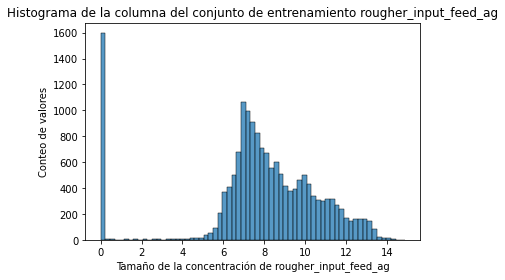

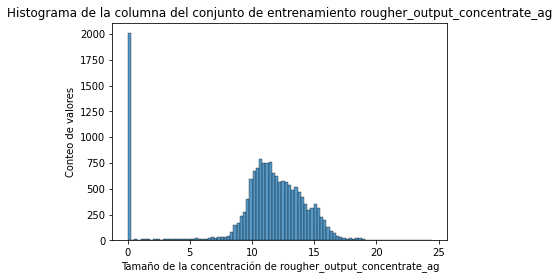

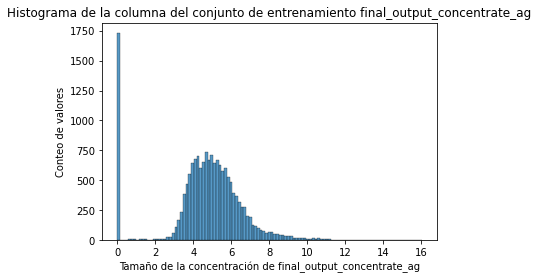

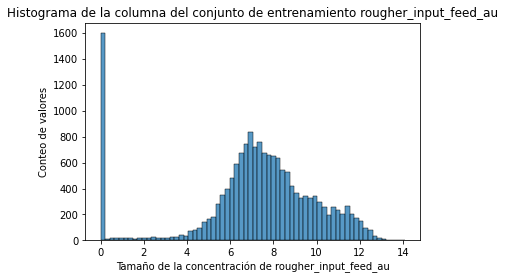

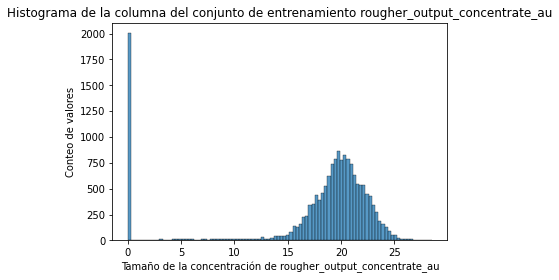

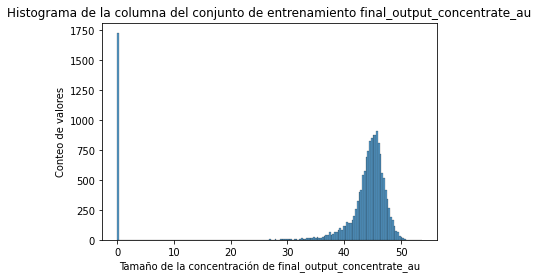

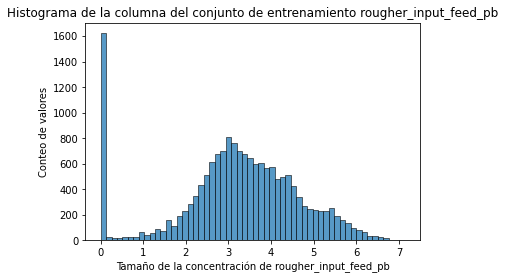

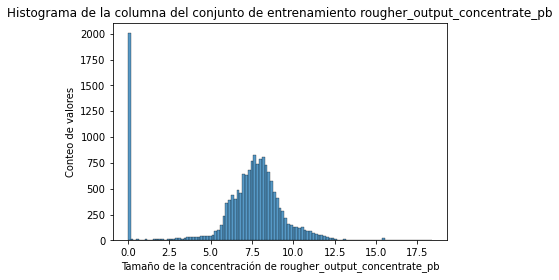

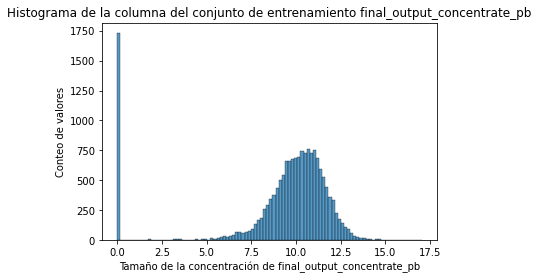

In [104]:
for p in plot:
    sns.histplot(train[p]).set(
                                title = "Histograma de la columna del conjunto de entrenamiento " + p,
                                xlabel = "Tamaño de la concentración de " + p,
                                ylabel = "Conteo de valores"
                                )
    plt.show()

Se puede visualizar que hay muchos valores en 0. Esto debió ocurrir, en el momento de la medición o se olvidó generar el valor. Realizar el cálculo por rangos intercuartílicos pudiera afectar en en el entrenamiento del modelo. Por consiguiente, se aceptarán todos los valores diferentes de 0, por tomaremos el valor 0 como omisión del llenado de datos.

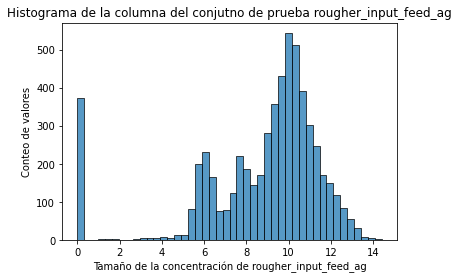

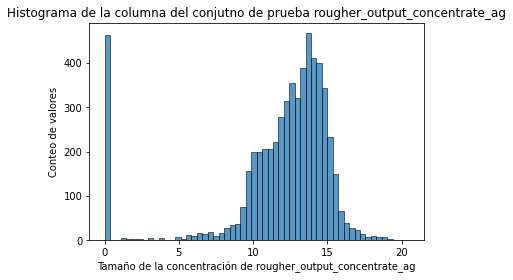

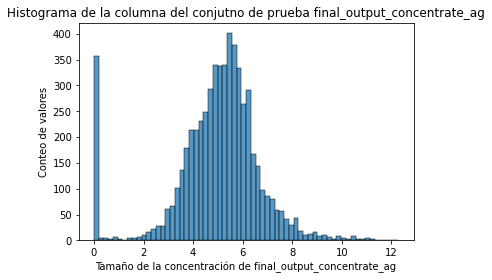

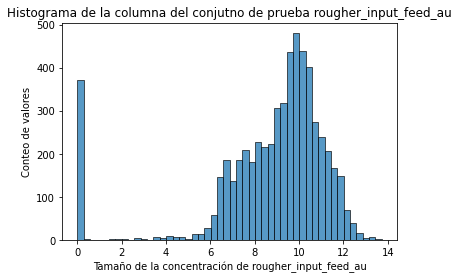

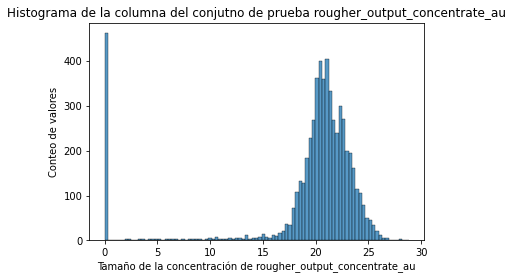

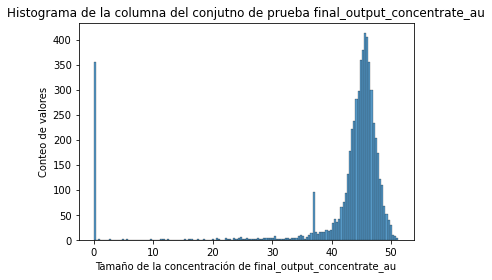

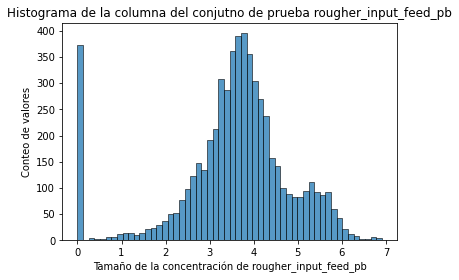

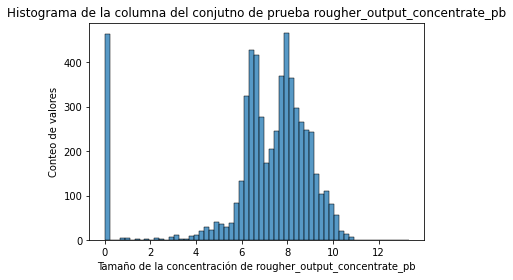

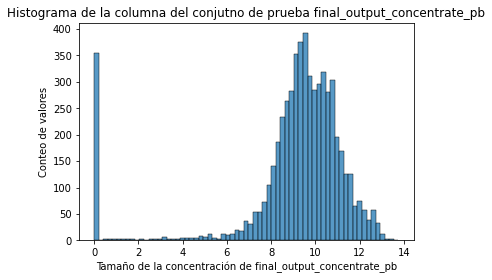

In [105]:
for p in plot:
    sns.histplot(test[p]).set(
                                title = "Histograma de la columna del conjutno de prueba " + p,
                                xlabel = "Tamaño de la concentración de " + p,
                                ylabel = "Conteo de valores"
                                )
    plt.show()

Se puede apreciar la misma situación para el caso del conjunto de prueba.

In [106]:
train_mask = train.query('rougher_input_feed_ag > 0 and rougher_output_concentrate_ag > 0 and final_output_concentrate_ag > 0')
train_mask = train_mask.query('rougher_input_feed_au > 0 and rougher_output_concentrate_au > 0 and final_output_concentrate_au > 0')
train_mask = train_mask.query('rougher_input_feed_pb > 0 and rougher_output_concentrate_pb > 0 and final_output_concentrate_pb > 0')
print("Porcentaje de datos filtrado del conjunto train:", round((1 - len(train_mask) / len(train))*100, 2))

Porcentaje de datos filtrado del conjunto train: 10.28


In [107]:
test_mask = test.query('rougher_input_feed_ag > 0 and rougher_output_concentrate_ag > 0 and final_output_concentrate_ag > 0')
test_mask = test_mask.query('rougher_input_feed_au > 0 and rougher_output_concentrate_au > 0 and final_output_concentrate_au > 0')
test_mask = test_mask.query('rougher_input_feed_pb > 0 and rougher_output_concentrate_pb > 0 and final_output_concentrate_pb > 0')
print("Porcentaje de datos filtrado del conjunto test:",round((1 - len(test_mask) / len(test))*100, 2))

Porcentaje de datos filtrado del conjunto test: 9.67


### Cambio en la concentración de metales en función de la etapa de purificación

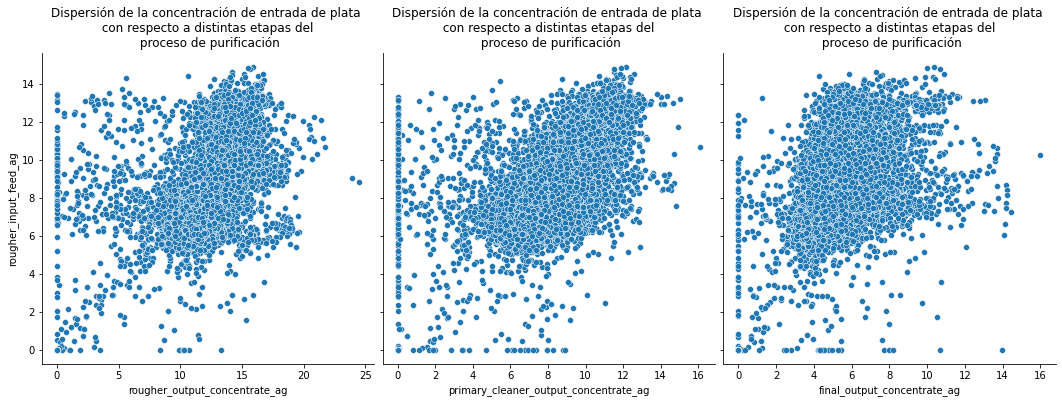

In [108]:
sns.pairplot(train_mask,
            y_vars= [ 
                "rougher_input_feed_ag"
                    ],
            x_vars= [
                "rougher_output_concentrate_ag",
                "primary_cleaner_output_concentrate_ag",
                "final_output_concentrate_ag"
                    ],
            height=5).set(title= "Dispersión de la concentración de entrada de plata \n con respecto a distintas etapas del \n proceso de purificación")
plt.show()

Se puede observar en el primer grafico, que las concentraciones de plata (Ag) estan entre 9 y 20. En la salida de la primera etapa de purificicación, se observa que la concentración de plata disminuye entre 2 y 13. En la salida de la 2da etapa de la purificación, se visualiza que la concentración de plata esta entre 2 y 11.

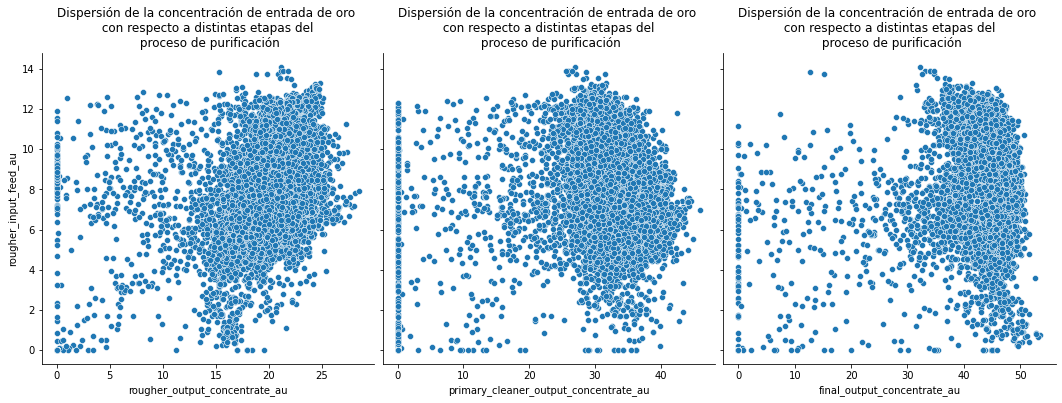

In [109]:

sns.pairplot(train_mask,
            y_vars= [
                "rougher_input_feed_au"
                    ],
            x_vars= [
                "rougher_output_concentrate_au",
                "primary_cleaner_output_concentrate_au",
                "final_output_concentrate_au"
                    ],
            height=5).set(title= "Dispersión de la concentración de entrada de oro \n con respecto a distintas etapas del \n proceso de purificación")
plt.show()

Se puede observar en el primer gráfico, la concentración del oro (Au) justo despues de la flotación del mineral, las cuales se encuentran entre 10 y 25. En la salida de la primera etapa de purificación, las concentraciones del oro se incrementan entre 15 y 40. Al final del proceso de purificación, la concentraciones del mineral incrementan y oscilan entre los 30 y 50.

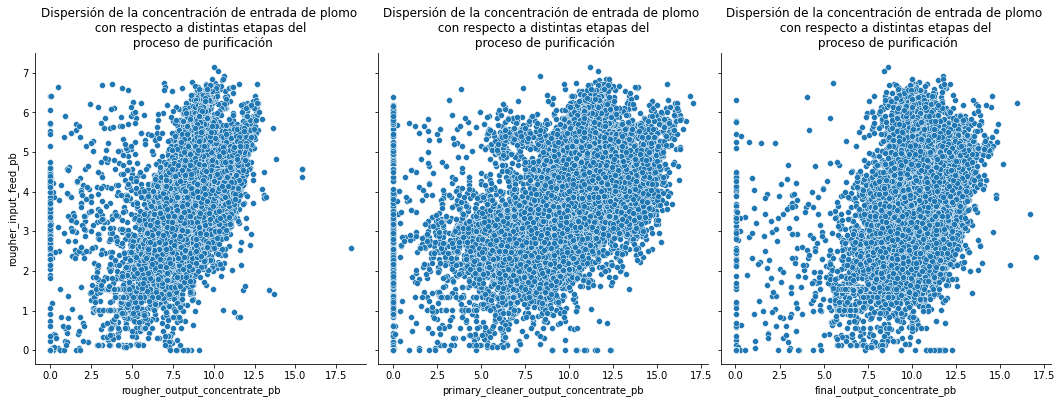

In [110]:
sns.pairplot(train_mask,
            y_vars= [ 
                "rougher_input_feed_pb"
                    ],
            x_vars= [
                "rougher_output_concentrate_pb",
                "primary_cleaner_output_concentrate_pb",
                "final_output_concentrate_pb"
                    ],
            height=5).set(title= "Dispersión de la concentración de entrada de plomo \n con respecto a distintas etapas del \n proceso de purificación")
plt.show()

Se puede observar en el primer gráfico, la concentración de plomo (pb) justo despues de la flotación del mineral, las cuales se encuentran entre 2.5 y 12.5. En la la salida de la primera etapa de purificación, las concentraciones aumentan entren 2.5 y 12.5. Al final del proceso de purificación, se observa un aumento en la concentración entre 5 y 15.

### Comparación del tamaño de particulas entre el conjunto de entrnamiento y prueba

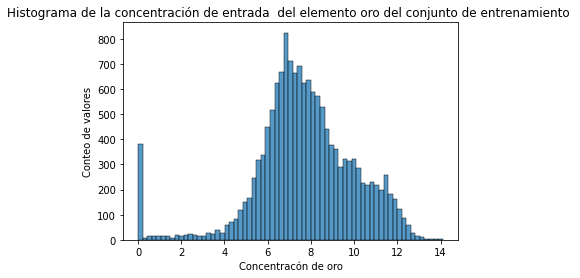

Estadisticas del conjunto de entrenamiento de la concentración de oro


count    15127.000000
mean         7.698200
std          2.360676
min          0.010000
25%          6.496203
50%          7.615937
75%          9.134144
max         14.093363
Name: rougher_input_feed_au, dtype: float64

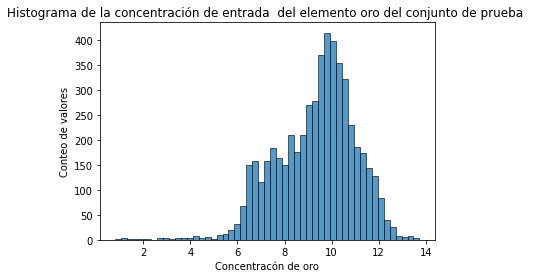

Estadisticas del conjunto de prueba de la concentración de oro


count    5290.000000
mean        9.326569
std         1.650532
min         0.799691
25%         8.209114
50%         9.594307
75%        10.452294
max        13.731330
Name: rougher_input_feed_au, dtype: float64

In [111]:
sns.histplot(train_mask["rougher_input_feed_au"]).set(
                                title = "Histograma de la concentración de entrada  del elemento oro del conjunto de entrenamiento ",
                                xlabel = "Concentracón de oro",
                                ylabel = "Conteo de valores"
                                )
plt.show()
print("Estadisticas del conjunto de entrenamiento de la concentración de oro")
display(train_mask["rougher_input_feed_au"].describe())

sns.histplot(test_mask["rougher_input_feed_au"]).set(
                                title = "Histograma de la concentración de entrada  del elemento oro del conjunto de prueba ",
                                xlabel = "Concentracón de oro",
                                ylabel = "Conteo de valores"
                                )
plt.show()
print("Estadisticas del conjunto de prueba de la concentración de oro")
display(test_mask["rougher_input_feed_au"].describe())


Se puede observar que la distribución de la media y la desviación estandar no son muy lejanas. Pero se observan muchos datos en 0.

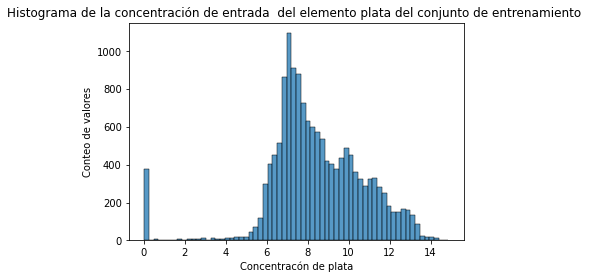

Estadisticas del conjunto de entrenamiento de la concentración de plata


count    15127.000000
mean         8.409800
std          2.382797
min          0.010000
25%          7.070813
50%          8.136317
75%          9.970297
max         14.869652
Name: rougher_input_feed_ag, dtype: float64

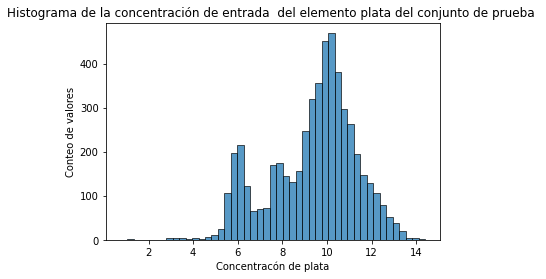

Estadisticas del conjunto de prueba de la concentración de plata


count    5290.000000
mean        9.359188
std         1.959301
min         0.756851
25%         8.095858
50%         9.762440
75%        10.654283
max        14.406130
Name: rougher_input_feed_ag, dtype: float64

In [112]:
sns.histplot(train_mask["rougher_input_feed_ag"]).set(
                                title = "Histograma de la concentración de entrada  del elemento plata del conjunto de entrenamiento ",
                                xlabel = "Concentracón de plata",
                                ylabel = "Conteo de valores"
                                )
plt.show()
print("Estadisticas del conjunto de entrenamiento de la concentración de plata")
display(train_mask["rougher_input_feed_ag"].describe())

sns.histplot(test_mask["rougher_input_feed_ag"]).set(
                                title = "Histograma de la concentración de entrada  del elemento plata del conjunto de prueba ",
                                xlabel = "Concentracón de plata",
                                ylabel = "Conteo de valores"
                                )
plt.show()
print("Estadisticas del conjunto de prueba de la concentración de plata")
display(test_mask["rougher_input_feed_ag"].describe())


Se puede observar que la distribución de la media y la desviación estandar no son muy lejanas. Pero se observan muchos datos en 0.

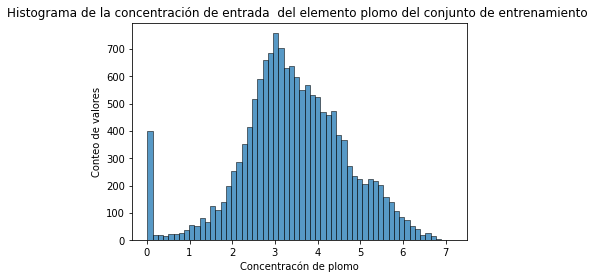

Estadisticas del conjunto de entrenamiento de la concentración de plomo


count    15127.000000
mean         3.436535
std          1.246311
min          0.010000
25%          2.707502
50%          3.389796
75%          4.249954
max          7.142594
Name: rougher_input_feed_pb, dtype: float64

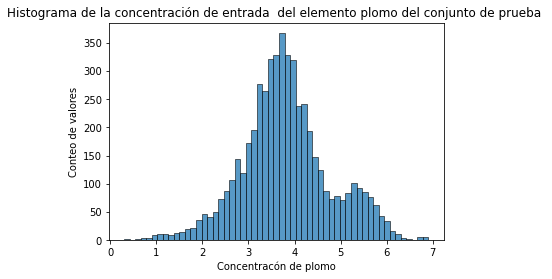

Estadisticas del conjunto de prueba de la concentración de plomo


count    5290.000000
mean        3.805733
std         0.969140
min         0.300816
25%         3.240127
50%         3.747721
75%         4.303261
max         6.905684
Name: rougher_input_feed_pb, dtype: float64

In [113]:
sns.histplot(train_mask["rougher_input_feed_pb"]).set(
                                title = "Histograma de la concentración de entrada  del elemento plomo del conjunto de entrenamiento ",
                                xlabel = "Concentracón de plomo",
                                ylabel = "Conteo de valores"
                                )
plt.show()
print("Estadisticas del conjunto de entrenamiento de la concentración de plomo")
display(train_mask["rougher_input_feed_pb"].describe())

sns.histplot(test_mask["rougher_input_feed_pb"]).set(
                                title = "Histograma de la concentración de entrada  del elemento plomo del conjunto de prueba ",
                                xlabel = "Concentracón de plomo",
                                ylabel = "Conteo de valores"
                                )
plt.show()
print("Estadisticas del conjunto de prueba de la concentración de plomo")
display(test_mask["rougher_input_feed_pb"].describe())


Se puede observar que la distribución de la media y la desviación estandar no son muy lejanas. Pero se observan muchos datos en 0.

## Entrenamiento del modelo

### Función sMAPE

Se realizará una función para calcular error medio absoluto porcentual simétrico, la cual servirá para conocer la calidad del modelo.

In [114]:
#calculo de calidad de la predicción
def smape_calc(test, predicted):
    #recibirá el series de prueba objetivo y el series de la predicción del modelo
    # yt es la suma de todo el conjunto de test y yp la suma de todo el conjunto de prediccion
    
    yt = abs(test.sum())
    yp = abs(predicted.sum())
    n = len(test)
    
    smape = (1/n) * (abs(yt - yp)) / ((abs(yt) + abs(yp)) / 2)
    
    return smape * 100

### Preparación de datos para el modelo

#### Creación de las variables features y target

Se requiere realizar la predicción de dos valores:

1. La recuperación del concentrado rougher = rougher.output.recovery.
2. La recuperación final del concentrado = final.output.recovery.


Para la creación de features y target para `rougher_output_recovery` solo se utilizarán las columnas relacionadas con la formular expuesta anteriormente

In [115]:
#Creación de la variable features para rougher
features_train_rougher = train[[
                                "rougher_output_concentrate_au", 
                                "rougher_input_feed_au", 
                                "rougher_output_tail_au"
                              ]]

features_test_rougher = test[[
                                "rougher_output_concentrate_au", 
                                "rougher_input_feed_au", 
                                "rougher_output_tail_au"
                              ]]

In [116]:
#Creacion de la variable target para rougher
target_train_rougher = train["rougher_output_recovery"]

target_test_rougher = test["rougher_output_recovery"]

In [117]:
#Creación de la variable features para final
features_train_final = train[[
                                "final_output_concentrate_au", 
                                "rougher_output_concentrate_au", 
                                "final_output_tail_au"
                              ]]

features_test_final = test[[
                                "final_output_concentrate_au", 
                                "rougher_output_concentrate_au", 
                                "final_output_tail_au"
                              ]]

Para la creación de features y target para `final_output_recovery` solo se utilizarán las columnas relacionadas con la formular expuesta anteriormente

In [118]:
#Creacion de la variable target para final
target_train_final = train["final_output_recovery"]

target_test_final = test["final_output_recovery"]

#### Escalado de las varibale numéricas

In [119]:
numeric = ["rougher_output_concentrate_au", 
           "rougher_input_feed_au", 
           "rougher_output_tail_au"]

scaler = StandardScaler()
scaler.fit(features_train_rougher[numeric])

StandardScaler()

In [120]:
features_train_rougher[numeric] = scaler.transform(features_train_rougher[numeric])
features_test_rougher[numeric] = scaler.transform(features_test_rougher[numeric])

/tmp/ipykernel_44/2402393986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_rougher[numeric] = scaler.transform(features_train_rougher[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [121]:
numeric = ["final_output_concentrate_au", 
           "rougher_output_concentrate_au", 
           "final_output_tail_au"]

scaler = StandardScaler()
scaler.fit(features_train_final[numeric])

StandardScaler()

In [122]:
features_train_final[numeric] = scaler.transform(features_train_final[numeric])
features_test_final[numeric] = scaler.transform(features_test_final[numeric])

/tmp/ipykernel_44/1615748201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_final[numeric] = scaler.transform(features_train_final[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

### Modelos de entrenamiento

Se utilizarán los modelos "DecisionTreeRegressor" y "RandomForestRegressor"; para encontrar el mejor valor de R2 con los hiperparámetros respectivos. Esto se realizará a traves de la técnica "GridSearch" con una "validación cruzada" de 20 iteraciones. 

#### Busca de hiperaparámetros para 'rougher_output_recovery'

In [123]:
model = DecisionTreeRegressor(random_state=931106)
params = [{'max_depth': list(range(1, 10))}]
clf = GridSearchCV(model, params, cv = 20, scoring='r2')
clf.fit(features_train_rougher, target_train_rougher)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 4}
0.1454184038568162


In [124]:
model = RandomForestRegressor(random_state=931106)
params = [{'n_estimators': list(range(1, 10))}]
clf = GridSearchCV(model, params, cv = 20, scoring='r2')
clf.fit(features_train_rougher, target_train_rougher)
print(clf.best_params_)
print(clf.best_score_)

{'n_estimators': 9}
0.2525402022586112


El mejor valor de R2, 33%, es para el modelo "RandomForestRegressor" con el hiperparámetro de n_estimators en 9

In [125]:
train.head()

,final_output_concentrate_ag,final_output_concentrate_pb,final_output_concentrate_sol,final_output_concentrate_au,final_output_recovery,final_output_tail_ag,final_output_tail_pb,final_output_tail_sol,final_output_tail_au,primary_cleaner_input_sulfate,...,secondary_cleaner_state_floatbank4_a_air,secondary_cleaner_state_floatbank4_a_level,secondary_cleaner_state_floatbank4_b_air,secondary_cleaner_state_floatbank4_b_level,secondary_cleaner_state_floatbank5_a_air,secondary_cleaner_state_floatbank5_a_level,secondary_cleaner_state_floatbank5_b_air,secondary_cleaner_state_floatbank5_b_level,secondary_cleaner_state_floatbank6_a_air,secondary_cleaner_state_floatbank6_a_level
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


#### Busca de hiperaparámetros para 'final_output_recovery'

In [126]:
model = DecisionTreeRegressor(random_state=931106)
params = [{'max_depth': list(range(1, 10))}]
clf = GridSearchCV(model, params, cv = 20, scoring='r2')
clf.fit(features_train_final, target_train_final)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 4}
0.21785918056685408


In [127]:
model = RandomForestRegressor(random_state=931106)
params = [{'n_estimators': list(range(1, 10))}]
clf = GridSearchCV(model, params, cv = 10, scoring='r2')
clf.fit(features_train_final, target_train_final)
print(clf.best_params_)
print(clf.best_score_)

{'n_estimators': 9}
0.06651797757812136


El mejor valor de R2, 21%, es para el modelo "DecisionTreeRegressor" con el hiperparámetro de max_depth en 4

Se utilizarán estos dos módelos con sus respectos y hiperaparámetros para realizar el entrenamiento y las predicciones.

### Entrenamiento y control de calidad para 'rougher_output_recovery'

In [128]:
model = RandomForestRegressor(random_state=931106, n_estimators= 9) 
model.fit(features_train_rougher, target_train_rougher) 
predicted_valid_rougher = model.predict(features_test_rougher) 

recm_test_rougher = mean_squared_error(target_test_rougher, predicted_valid_rougher) ** 0.5 #Se eleva a potencia 0.5 para obtener RECM
r2_test_rougher = r2_score(target_test_rougher, predicted_valid_rougher)
mean_rougher = target_test_rougher.mean()

print("Valor promedio de la recuperación rougher", mean_rougher)
print("Raiz cuadrada del error cuadrático medio del conjunto de prueba:", recm_test_rougher)
print("Valor R2 del conjuntos de validación:", r2_test_rougher)


Valor promedio de la recuperación rougher 84.35343259910242
Raiz cuadrada del error cuadrático medio del conjunto de prueba: 10.41779763458916
Valor R2 del conjuntos de validación: 0.43752168156994187


Se obtuvo una predicción de calidad media, con R2 del 43%, se tiene un RECM de 10.4 y un promedio del conjunto de prueba del 84.35

### Entrenamiento y control de calidad para 'final_output_recovery'

In [129]:
model = DecisionTreeRegressor(random_state=931106, max_depth= 4) 
model.fit(features_train_final, target_train_final) 
predicted_valid_final = model.predict(features_test_final) 

recm_test_final = mean_squared_error(target_test_final, predicted_valid_final) ** 0.5 #Se eleva a potencia 0.5 para obtener RECM
r2_test_final = r2_score(target_test_final, predicted_valid_final)
mean_final = target_test_final.mean()

print("Valor promedio de la recuperación final", mean_final)
print("Raiz cuadrada del error cuadrático medio del conjunto de prueba:", recm_test_final)
print("Valor R2 del conjuntos de validación:", r2_test_final)


Valor promedio de la recuperación final 66.68190704868785
Raiz cuadrada del error cuadrático medio del conjunto de prueba: 9.22643263512302
Valor R2 del conjuntos de validación: 0.4199179217919007


Se obtuvo una predicción de calidad media con R2 de casi 42%. El promedio del conjunto de prueba es de 66.68 y una RECM de 9.22

### Aplicación de calidad sMAPE

In [130]:
#Calculo de sMape para recuperacion rougher
smape_rougher = smape_calc(target_test_rougher, predicted_valid_rougher)
smape_rougher

0.00032484026982010383

In [131]:
#Calculo de sMape para recuperacion final
smape_final = smape_calc(target_test_final, predicted_valid_final)
smape_final

0.0006211384327779239

In [132]:
smape = 0.25 * smape_rougher + 0.75 * smape_final

In [133]:
smape

0.0005470638920384689

Se obtuvo un valor del error medio pocentual absoluto de casi 0. Por consiguiente se puede deducir que las predicciones fueron buenas.

## Conclusiones

Es importante recalcar, que no se utilizaron todos los datos de los dataset originales, debido a que existian muchos valores en 0, por lo que se asumió, que el valor al momento de su medición no se registró la lectura desde su inicio y no tendría valor para el analisis. 

En el analisis de los datos se analizaron las concentraciones de distintos elementos a traves del procedimiento de purificación del oro. Se pudo observar que conforme el mineral avanza en las etapas de purificación, las concentraciones de oro y plomo aumenta. En cambio las concentraciones de la plata disminuyeron.

Despues, se adecuaron los datos para realizar el entrenamiento de los modelos con las técnicas e hiperparámetros mejor calificados por la validación cruzada. A pesar que se tuvieron mediciones de valor de R2 del 40%, un modelo de calidad media de predicción. El porcentaje sMAPE fue muy bajo, casi 0.